# Analysing customer churn

A new telco company is in the process of establishing themselves in the USA. They started by running a trial in Florida. New customers were able to use cellphones on the companies network at very low rates for one year. Not all customers stayed with the company for the whole year. Many of them left. This is known a customer churn. The company wants to tackle the problem of customer churn with two marketing campaigns.

The first marketing campaign is aimed at cities. The four cities with the highest rate of customer churn will be selected for the marketing campaign.The second marketing campaign will focus on individual customers. Customers who are likely to leave the company should receive the offer of a special deal, before they churn.

This project identifies cities and customers who should be targeted with marketing campaigns.

You can access the data in a csv file named *telco_data.csv*. The following tables contain explanations about the database structure.

`churn_data` table:

Column number | Column name       | Type      | Description
 ------------ | :---------:           | :---------:           | ------------:
0             | `account_length`        | numerical (`int`)     | Unknown units of time, how long the customer has been a customer.
1             | `international_plan`    | categorical (nominal) | Contract with special conditions for cheaper calls to other countries.
2             | `voice_mail_plan`       | categorical (nominal) | Contract with special conditions for more voicemail storage.
3             | `number_vmail_messages` | numerical (`int`)     | Number of voicemail messages.
4             | `total_day_minutes`     | numerical (`float`)   | Duration in minutes of all calls from 8am to 4pm.
5             | `total_day_calls`      | numerical (`int`)     | Number of all calls from 8am to 4pm.
6             | `total_day_charge`     | numerical (`float`)   | Calculated costs for all calls from 8am to 4pm.
7             | `total_eve_minutes`     | numerical (`float`)   | Duration in minutes of all calls from 4pm to 10pm.
8             | `total_eve_calls`      | numerical (`int`)     | Number of all calls from 4pm to 10pm.
9             | `total_eve_charge`     | numerical (`float`)   | Calculated costs for all calls from 4pm to 10pm.
10             | `total_night_minutes`     | numerical (`float`)   | Duration in minutes of all calls from 10pm to 8am.
11             | `total_night_calls`      | numerical (`int`)     | Number of all calls from 10pm to 8am.
12             | `total_night_charge`     | numerical (`float`)   | Calculated costs for all calls from 10pm to 8am.
13            | `customer_service_calls`| numerical (`int`)     | Number of calls to customer service, e.g. due to technical problems.
14            | `churn`                 | categorical (nominal) | Did the customer leave? (1=yes 0=no)
15            | `local_area_code`       | categorical (nominal) | local area code for telephone.
16            | `phone_num`             | Categorical (nominal) | Customers telephone number not including the local area code.

`cities` table:

Column number | Column name       | Type           | Description
 ------------ | :---------:          | :---------:           | ------------:
0            | `city`       | categorical (nominal) | Cities.
1            | `area_code`       | categorical (nominal) | local area code for telephone.

## Import data

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import sqlalchemy as sa
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'churn_analysis.png',
 'customer_service_calls_candidates.csv',
 'day_call_minutes_candidates_conservitive.csv',
 'day_call_minute_candidates_liberal.csv',
 'location_based_candidates.csv',
 'plan_based_candidates.csv',
 'telco_data.csv',
 'telco_db.csv',
 'Telefonica_churn-Copy1.ipynb',
 'Telefonica_churn.ipynb']

In [3]:
df = pd.read_csv('telco_data.csv')
df.head(10)

,city,area_code,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,phone_num
0,Orlando1,321,1,no,no,0.0,182.1,106.0,30.96,134.9,106.0,11.47,152.3,75.0,6.85,5,1,4254
1,Orlando1,321,11,no,yes,38.0,209.8,130.0,35.67,196.6,84.0,16.71,233.0,79.0,10.49,1,0,4310
2,Orlando1,321,12,yes,no,0.0,216.7,117.0,36.84,116.5,126.0,9.90,220.0,110.0,9.90,2,0,5211
3,Orlando1,321,21,no,yes,31.0,135.9,90.0,23.10,271.0,84.0,23.04,179.1,89.0,8.06,6,0,5976
4,Orlando1,321,22,no,no,0.0,181.8,108.0,30.91,198.6,148.0,16.88,206.6,96.0,9.30,2,0,9506
5,Orlando1,321,22,no,no,0.0,207.7,116.0,35.31,210.6,99.0,17.90,238.2,88.0,10.72,0,0,2401
6,Orlando1,321,25,no,no,0.0,119.3,87.0,20.28,211.5,101.0,17.98,268.9,86.0,12.10,3,0,2709
7,Orlando1,321,27,no,no,0.0,227.4,67.0,38.66,248.0,115.0,21.08,61.4,109.0,2.76,1,0,1589
8,Orlando1,321,28,no,no,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,2,0,8230
9,Orlando1,321,29,no,no,0.0,196.8,81.0,33.46,168.0,110.0,14.28,132.6,98.0,5.97,2,0,6666


## Check and clean the data

In [4]:
df.dtypes

city                       object
area_code                   int64
account_length              int64
international_plan         object
voice_mail_plan            object
number_vmail_messages     float64
total_day_minutes         float64
total_day_calls           float64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls           float64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls         float64
total_night_charge        float64
customer_service_calls      int64
churn                       int64
phone_num                   int64
dtype: object

In [5]:
#check for nans
df.isna().sum()

city                       0
area_code                  0
account_length             0
international_plan         0
voice_mail_plan            0
number_vmail_messages     22
total_day_minutes          0
total_day_calls           11
total_day_charge           0
total_eve_minutes          0
total_eve_calls            8
total_eve_charge           0
total_night_minutes        0
total_night_calls          5
total_night_charge         0
customer_service_calls     0
churn                      0
phone_num                  0
dtype: int64

In [6]:
#check the categories contain expected values
print('churn')
print(df.loc[:, 'churn'].unique())
print('\n')
print('area_code')
print(df.loc[:, 'area_code'].unique())
print('\n')
print('internaional_plan')
print(df.loc[:, 'international_plan'].unique())
print('\n')
print('voice_mail_plan')
print(df.loc[:, 'voice_mail_plan'].unique())

churn
[1 0]


area_code
[321 407 305 786 904 813 561 386 727 941 239 850]


internaional_plan
['no' 'yes']


voice_mail_plan
['no' 'yes']


In [7]:
#define a function to change data types 

def change_data_type(data_frame, list_of_column_names, data_type):
    """ Takes a pandas DataFrame, a list of column names and a data type and returns the 
    the DataFrame with the list columns havining been transformed to the specified type """
   
    for col in list_of_column_names:
        data_frame.loc[:,col] = data_frame.loc[:,col].astype(data_type)
    return data_frame

In [8]:
# apply the function to columns that need changing
to_cat = ['churn', 'area_code', 'phone_num', 'international_plan', 'voice_mail_plan', 'city']
to_int = ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'customer_service_calls']

change_data_type(df, to_cat, 'category')
change_data_type(df, to_int, pd.Int64Dtype())

df.dtypes

city                      category
area_code                 category
account_length               Int64
international_plan        category
voice_mail_plan           category
number_vmail_messages        Int64
total_day_minutes          float64
total_day_calls              Int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              Int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            Int64
total_night_charge         float64
customer_service_calls       Int64
churn                     category
phone_num                 category
dtype: object

In [9]:
# check how the data looks
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls
count,3333.000000,3311.000000,3333.000000,3322.000000,3333.000000,3333.000000,3325.000000,3333.000000,3333.000000,3328.000000,3333.000000,3333.000000
mean,101.064806,8.152824,179.883168,100.407586,30.562307,200.980348,100.105564,17.083540,200.872037,100.115385,9.039325,1.531053
std,39.822106,13.717793,54.858487,20.046875,9.259435,50.713844,19.903150,4.310668,50.573847,19.554581,2.275873,1.352384
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,-2.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,2.000000
max,243.000000,51.000000,448.600000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [10]:
# change negative values from customer_service_calls to np.nan
clean_df = df
for i in range(len(clean_df)):
    if clean_df.iloc[i,15] < 0:
        clean_df.iloc[i,15] = np.nan
clean_df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls
count,3333.000000,3311.000000,3333.000000,3322.000000,3333.000000,3333.000000,3325.000000,3333.000000,3333.000000,3328.000000,3333.000000,3296.000000
mean,101.064806,8.152824,179.883168,100.407586,30.562307,200.980348,100.105564,17.083540,200.872037,100.115385,9.039325,1.564320
std,39.822106,13.717793,54.858487,20.046875,9.259435,50.713844,19.903150,4.310668,50.573847,19.554581,2.275873,1.321741
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,2.000000
max,243.000000,51.000000,448.600000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


#### ...the data looks ready to use. Now I move on to determine which city's should be targeted by the champaign

## Identify the cities with the highest churn rates

In [11]:
# create a crosstab by city, then sort the results by the churn rate (1)
city_churn = pd.crosstab(index=clean_df.loc[:,'city'], columns=df.loc[:,'churn'], normalize='index')
sorted_city_churn = city_churn.sort_values(1, ascending=False)
sorted_city_churn

churn,0,1
city,,
Jacksonville,0.701807,0.298193
Orlando1,0.763333,0.236667
Cape Coral,0.782178,0.217822
Orlando2,0.809211,0.190789
Daytona Beach,0.830325,0.169675
Miami1,0.866920,0.133080
Miami2,0.890411,0.109589
Sarasota,0.907631,0.092369
Clearwater,0.930612,0.069388


In [12]:
# take the first 4 values in the sorted DataFrame as the identified 'high churn cities'
high_churn_cities_text = 'The four cities with the highest rates of customer churn are {}, {}, {} and {}'.format(
    sorted_city_churn.index[0], sorted_city_churn.index[1], sorted_city_churn.index[2], sorted_city_churn.index[3])
high_churn_cities_text

'The four cities with the highest rates of customer churn are Jacksonville, Orlando1, Cape Coral and Orlando2'

In [13]:
# Now I save take only the customers in these cities, and save their info in a csv file. 
city_mask = (clean_df.loc[:,'city'] == 'Jacksonville') | (clean_df.loc[:,'city'] == 'Orlando1') | (clean_df.loc[:,'city'] == 'Orlando2') |(clean_df.loc[:,'city'] == 'Cape Coral') 
df_selected_cities = clean_df.loc[city_mask,:]
churn_mask = df_selected_cities.loc[:,'churn'] == 0
target_city_customers = df_selected_cities.loc[churn_mask,:]
target_city_customers

,city,area_code,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,phone_num
1,Orlando1,321,11,no,yes,38,209.8,130,35.67,196.6,84,16.71,233.0,79,10.49,1,0,4310
2,Orlando1,321,12,yes,no,0,216.7,117,36.84,116.5,126,9.90,220.0,110,9.90,2,0,5211
3,Orlando1,321,21,no,yes,31,135.9,90,23.10,271.0,84,23.04,179.1,89,8.06,6,0,5976
4,Orlando1,321,22,no,no,0,181.8,108,30.91,198.6,148,16.88,206.6,96,9.30,2,0,9506
5,Orlando1,321,22,no,no,0,207.7,116,35.31,210.6,99,17.90,238.2,88,10.72,0,0,2401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,Cape Coral,239,186,no,no,0,137.8,97,23.43,187.7,118,15.95,146.4,85,6.59,1,0,6454
3046,Cape Coral,239,186,no,yes,26,74.3,107,12.63,177.3,116,15.07,296.3,90,13.33,2,0,3913
3047,Cape Coral,239,189,no,no,0,227.8,124,38.73,169.5,112,14.41,201.1,91,9.05,3,0,6501
3048,Cape Coral,239,190,no,no,0,150.9,86,25.65,268.6,129,22.83,179.9,73,8.10,1,0,1096


In [14]:
# save dataset for location based marketing
target_city_customers.to_csv('location_based_candidates.csv')
os.listdir()

['.ipynb_checkpoints',
 'churn_analysis.png',
 'customer_service_calls_candidates.csv',
 'day_call_minutes_candidates_conservitive.csv',
 'day_call_minute_candidates_liberal.csv',
 'location_based_candidates.csv',
 'plan_based_candidates.csv',
 'telco_data.csv',
 'telco_db.csv',
 'Telefonica_churn-Copy1.ipynb',
 'Telefonica_churn.ipynb']

## Examine categorical variables that could be used to tell if a customer will leave soon

In [15]:
# explore the international plan customers
international_churn = pd.crosstab(index=clean_df.loc[:,'international_plan'], columns=clean_df.loc[:,'churn'], normalize='index')
sorted_international_churn = international_churn.sort_values(1, ascending=False)
sorted_international_churn

churn,0,1
international_plan,,
yes,0.575851,0.424149
no,0.885050,0.114950


In [16]:
# expore the voicemail customers
voicemail_churn = pd.crosstab(index=clean_df.loc[:,'voice_mail_plan'], columns=clean_df.loc[:,'churn'], normalize='index')
sorted_voicemail_churn = voicemail_churn.sort_values(1, ascending=False)
sorted_voicemail_churn

churn,0,1
voice_mail_plan,,
no,0.832849,0.167151
yes,0.913232,0.086768


In [17]:
# It seems like the international plan is associated with higher chrun rates. But what about the customer that have neither voice or international plans? What if they had both?
# define a function to categorise customers according to which plan(s) they have : 

def categorise_plans(df):
    """Takes a pandas DataFrame and categorises the each row as 
    'No Plan', 'International only', 'Voicemail only', or 'International & Voicemail'
    returns the dataframe with an extra columns called 'which_plan' with the data type 'category'
    """
    new = []
    for i in range(len(df)):
        if (df.iloc[i,3] == 'no') & (df.iloc[i,4] == 'no'):
            new.append('No plan')
        elif (df.iloc[i,3] == 'yes') & (df.iloc[i,4] == 'no'):
            new.append('International only')
        elif (df.iloc[i,3] == 'no') & (df.iloc[i,4] == 'yes'):
            new.append('Voicemail only')
        elif (df.iloc[i,3] == 'yes') & (df.iloc[i,4] == 'yes'):
            new.append('International & Voicemail ')
        else: 
            new.append('error')
        
    df.loc[:,'which_plan'] = new
    change_data_type(df, ['which_plan'], 'category')

In [18]:
categorise_plans(clean_df)
clean_df.dtypes

city                      category
area_code                 category
account_length               Int64
international_plan        category
voice_mail_plan           category
number_vmail_messages        Int64
total_day_minutes          float64
total_day_calls              Int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              Int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            Int64
total_night_charge         float64
customer_service_calls       Int64
churn                     category
phone_num                 category
which_plan                category
dtype: object

In [19]:
# explore new category with pd.crosstab
plan_churn = pd.crosstab(index=clean_df.loc[:,'which_plan'], columns=clean_df.loc[:,'churn'], normalize='index')
sorted_plan_churn = plan_churn.sort_values(1, ascending=False)
sorted_plan_churn

churn,0,1
which_plan,,
International only,0.562771,0.437229
International & Voicemail,0.608696,0.391304
No plan,0.861468,0.138532
Voicemail only,0.946988,0.053012


In [20]:
# Now it is clear that the customer on the international plan only have the highest churn rate. 
# Now I isolate current customers on the international plan and save their info to a csv file for the company's reference 

# those on an international plan 
international_mask = clean_df.loc[:,'international_plan'] == 'yes'
international_customers = clean_df.loc[international_mask, :]

# those who have not churned yet
current_international_mask =  international_customers.loc[:,'churn'] == 0
likely_to_leave_cat = international_customers.loc[current_international_mask, :]
likely_to_leave_cat

,city,area_code,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,phone_num,which_plan
2,Orlando1,321,12,yes,no,0,216.7,117,36.84,116.5,126,9.90,220.0,110,9.90,2,0,5211,International only
38,Orlando1,321,57,yes,yes,30,234.5,130,39.87,195.2,116,16.59,268.8,94,12.10,2,0,3782,International & Voicemail
101,Orlando1,321,85,yes,no,0,216.0,73,36.72,188.2,117,16.00,147.1,98,6.62,2,0,2776,International only
120,Orlando1,321,90,yes,no,0,221.8,97,37.71,203.8,134,17.32,215.8,154,9.71,1,0,7293,International only
130,Orlando1,321,94,yes,no,0,235.6,131,40.05,194.8,107,16.56,170.6,93,7.68,1,0,9254,International only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,Tallahassee,850,149,yes,no,0,180.9,79,30.75,194.9,83,16.57,197.8,109,8.90,3,0,9079,International only
3304,Tallahassee,850,155,yes,no,0,163.1,94,27.73,291.7,108,24.79,96.4,111,4.34,0,0,2961,International only
3305,Tallahassee,850,155,yes,yes,26,211.7,121,35.99,139.2,123,11.83,146.7,89,6.60,1,0,8362,International & Voicemail
3314,Tallahassee,850,161,yes,no,0,189.6,78,32.23,267.4,117,22.73,184.5,137,8.30,1,0,1349,International only


In [21]:
likely_to_leave_cat.to_csv('plan_based_candidates.csv')

## Examine integer variables which could indicated which customers may leave soon

churn
0    AxesSubplot(0.125,0.125;0.775x0.107857)
1    AxesSubplot(0.125,0.125;0.775x0.107857)
Name: customer_service_calls, dtype: object

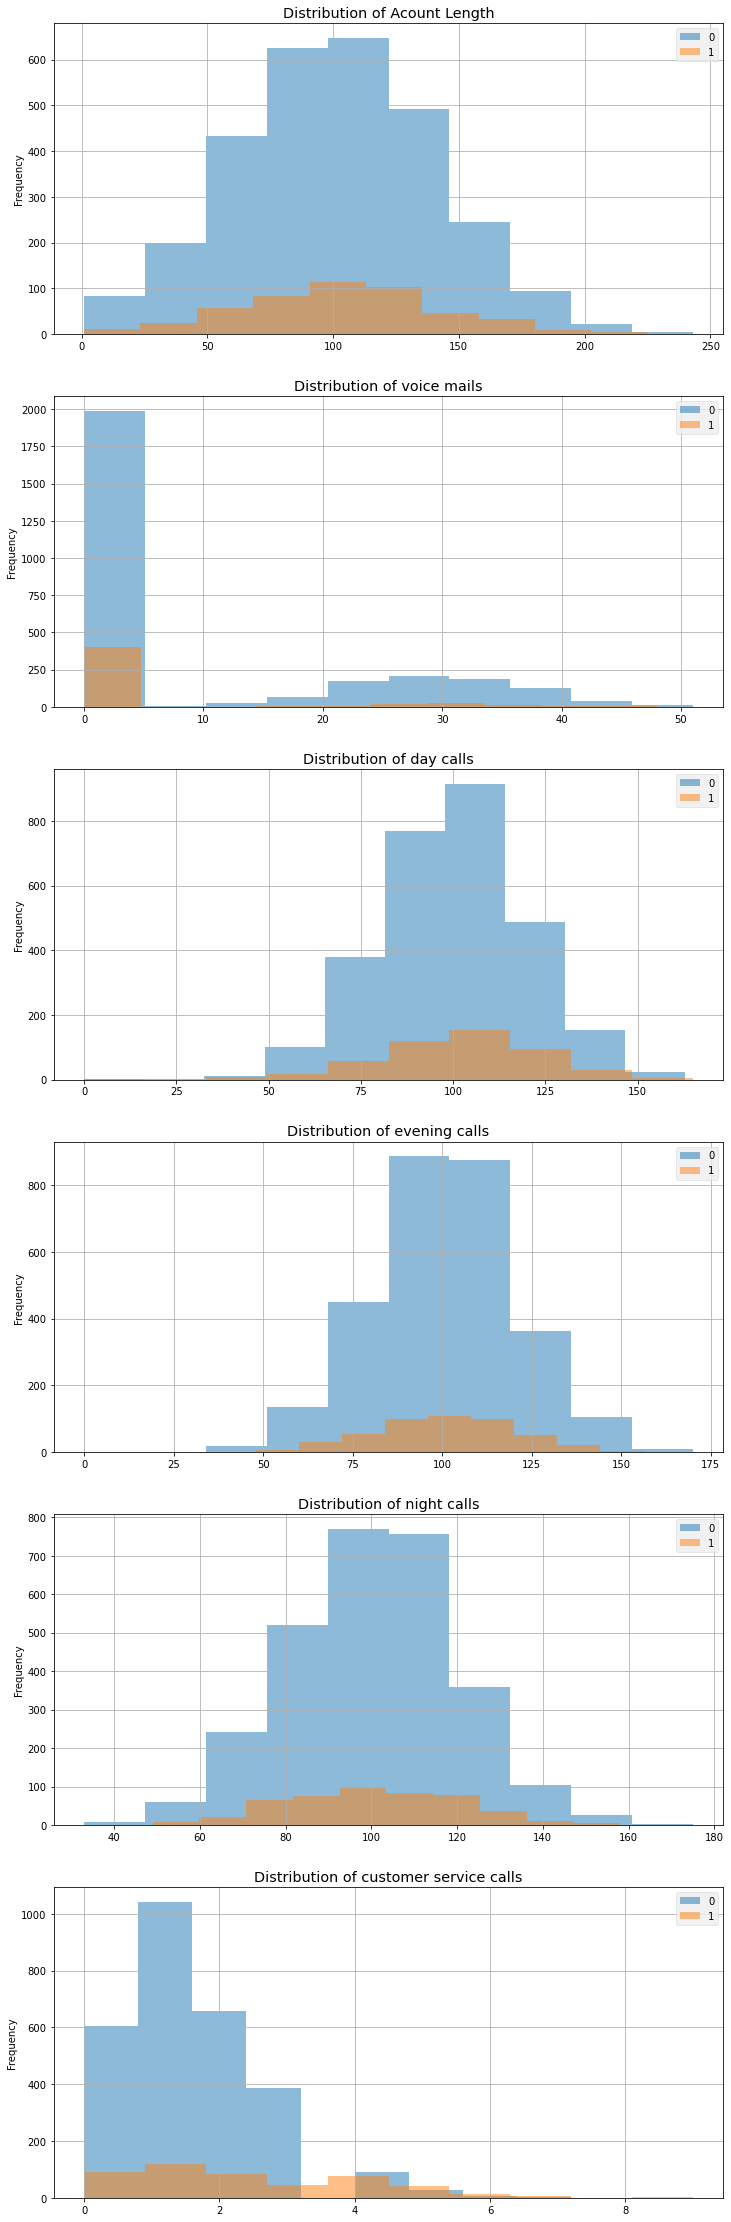

In [22]:
# first examine the distribution of the data with boxplots
fig_grouped, ax = plt.subplots(nrows=6, ncols=1, figsize=[12, 40])
plt.style.use('bmh')

clean_df.groupby('churn')['account_length'].plot(kind='hist', legend=True, alpha = 0.5, ax=ax[0], title='Distribution of Acount Length')
clean_df.groupby('churn')['number_vmail_messages'].plot(kind='hist', legend=True, alpha = 0.5, ax=ax[1], title='Distribution of voice mails')
clean_df.groupby('churn')['total_day_calls'].plot(kind='hist', legend=True, alpha = 0.5, ax=ax[2], title='Distribution of day calls')
clean_df.groupby('churn')['total_eve_calls'].plot(kind='hist', legend=True, alpha = 0.5, ax=ax[3], title='Distribution of evening calls')
clean_df.groupby('churn')['total_night_calls'].plot(kind='hist', legend=True, alpha = 0.5, ax=ax[4], title='Distribution of night calls')
clean_df.groupby('churn')['customer_service_calls'].plot(kind='hist', legend=True, alpha = 0.5, ax=ax[5], title='Distribution of customer service calls')

customer_service_calls                                               \
                       count      mean       std  min   5%  25%  50%  75%   
churn                                                                       
0                     2820.0  1.450000  1.168942  0.0  0.0  1.0  1.0  2.0   
1                      476.0  2.241597  1.863340  0.0  0.0  1.0  2.0  4.0   

                 
       95%  max  
churn            
0      3.0  8.0  
1      5.0  9.0

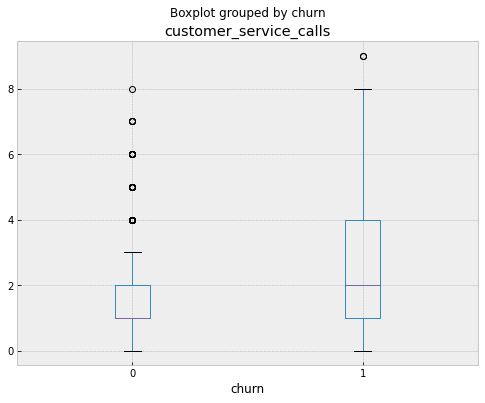

In [23]:
#the distribution of customer service calls warrants further investigation 
csc_fig, csc_ax = plt.subplots(figsize=[8,6])
clean_df.boxplot(column='customer_service_calls', by='churn', ax=csc_ax);

cs_df = clean_df[['churn', 'customer_service_calls']]
cs_df.groupby('churn').describe(percentiles=([0.05, .25, .5, .75, .95]))

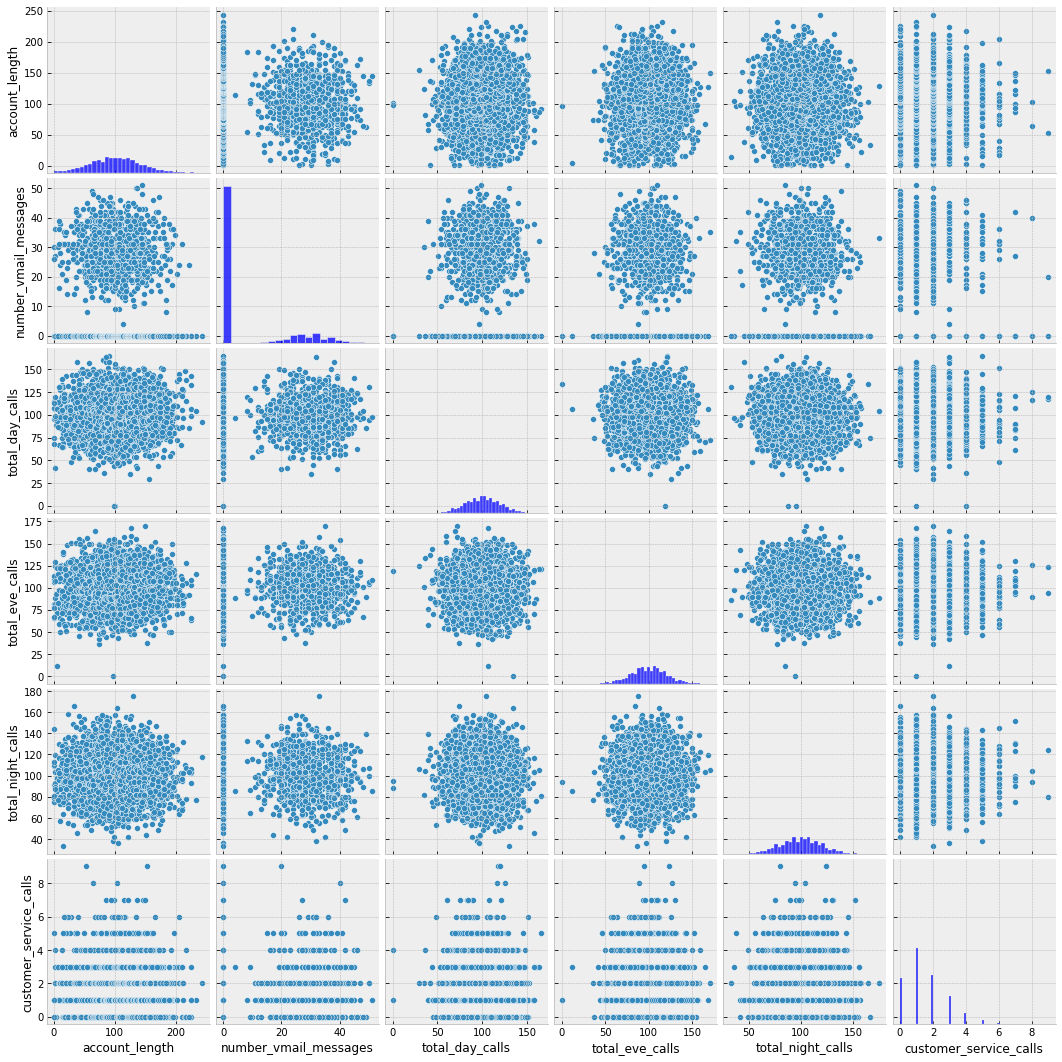

In [24]:
# finally, check scatter plot matrix to ensure no other variables are of interest
int_df = df[['account_length','number_vmail_messages','total_day_calls', 'total_eve_calls', 'total_night_calls', 'customer_service_calls', 'churn']]
sns.pairplot(int_df);

### Establishing a threshold

Text(0.5, 0.5, 'threshold')

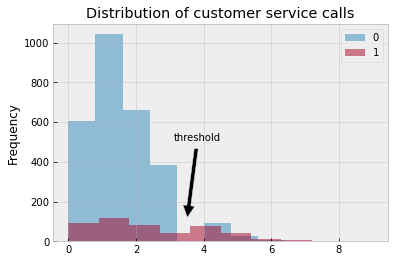

In [25]:
# given the distribution of customer_service_calls in the churned and not churned groups 
# a threshold of greater than 3 should be implemented to identify customers who may be about to 'churn'. 
# Given 95% of the customers who stayed made 3 or fewer calls to customer service, (compared with 25% of customers who 
# churned making 4 or more calls) this conservative threshold can expect to catch those who may leave. Additonally, the 
# historgram shows a clear break between 3-4 customer calls for those who have not churned

threshold = 3
fig_threshold, ax = plt.subplots()

clean_df.groupby('churn')['customer_service_calls'].plot(kind='hist', legend=True, alpha = 0.5, ax=ax, title='Distribution of customer service calls')
ax.annotate('threshold', xy=(3.5, 100),  xycoords='data',
            xytext=(0.5, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

In [26]:
# Now I isolate the customers based on this threshold
threshold_mask = clean_df.loc[:,'customer_service_calls'] >= threshold
likely_to_leave_int = clean_df.loc[threshold_mask,:]
# pd.crosstab(index=likely_to_leave_int.loc[:,'churn'], columns='count')
current_mask = clean_df.loc[:,'churn'] == 0
likely_to_leave_int_and_current = likely_to_leave_int.loc[current_mask,:]
likely_to_leave_int_and_current

,city,area_code,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,phone_num,which_plan
3,Orlando1,321,21,no,yes,31,135.9,90,23.10,271.0,84,23.04,179.1,89,8.06,6,0,5976,Voicemail only
6,Orlando1,321,25,no,no,0,119.3,87,20.28,211.5,101,17.98,268.9,86,12.10,3,0,2709,No plan
14,Orlando1,321,37,no,no,0,191.4,116,32.54,167.4,99,14.23,216.5,112,9.74,3,0,1131,No plan
21,Orlando1,321,46,no,no,0,199.2,111,33.86,175.1,83,14.88,210.6,84,9.48,3,0,5873,No plan
25,Orlando1,321,50,no,no,0,188.9,94,32.11,203.9,104,17.33,151.8,124,6.83,3,0,6002,No plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,Tallahassee,850,151,no,no,0,156.4,108,26.59,233.4,118,19.84,195.7,141,8.81,4,0,1405,No plan
3308,Tallahassee,850,157,no,no,0,220.7,105,37.52,119.3,127,10.14,165.1,113,7.43,4,0,9783,No plan
3316,Tallahassee,850,169,yes,no,0,57.1,98,9.71,199.7,78,16.97,274.7,103,12.36,3,0,5870,International only
3330,Tallahassee,850,209,no,no,0,227.2,128,38.62,258.4,92,21.96,183.5,74,8.26,3,0,5310,No plan


In [27]:
# and save those customers in a csv for the marketing team to use in the campaign
likely_to_leave_int_and_current.to_csv('customer_service_calls_candidates.csv')

## Examine which floating data series could identify customers soon to leave? What threshold should be used?

In [28]:
float_df = clean_df[['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge',
                    'total_night_minutes', 'total_night_charge', 'churn']]

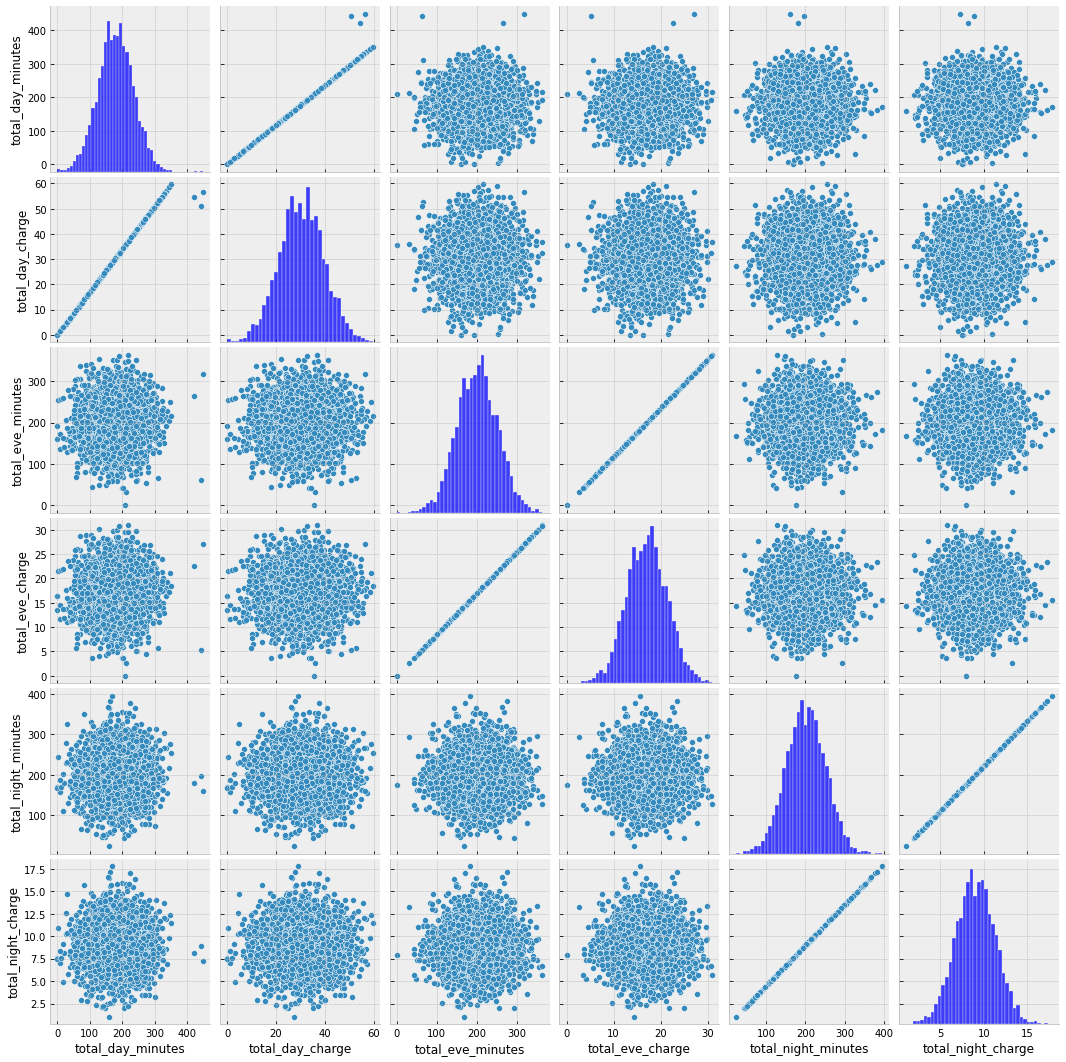

In [29]:
sns.pairplot(float_df);

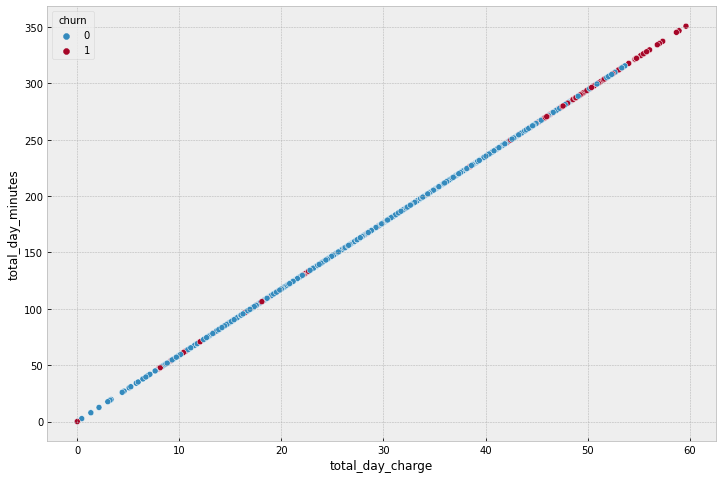

In [30]:
# first remove the outliers that can be seen in the total day mintues v total day charge plot in the top right
outlier_mask = float_df.loc[:,'total_day_minutes'] < 400
clean_float = float_df.loc[outlier_mask,:]

# remove these from full dataset too 
outlier_mask = clean_df.loc[:,'total_day_minutes'] < 400
clean_df = clean_df.loc[outlier_mask,:]

# now visualise the relationship to make sure the outliers were successfully removed
fig_days, ax_days = plt.subplots(figsize=[12,8])
sns.scatterplot(x='total_day_charge', y='total_day_minutes', data=clean_df, ax=ax_days, hue='churn') ;

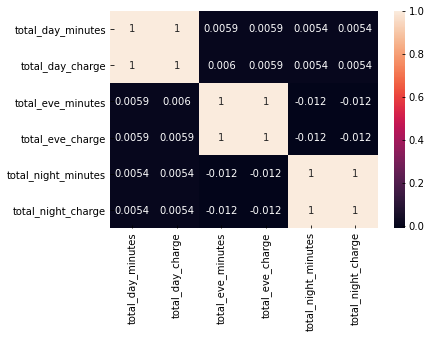

In [31]:
# check for any cross correlations 
sns.heatmap(clean_float.corr(), annot=True);

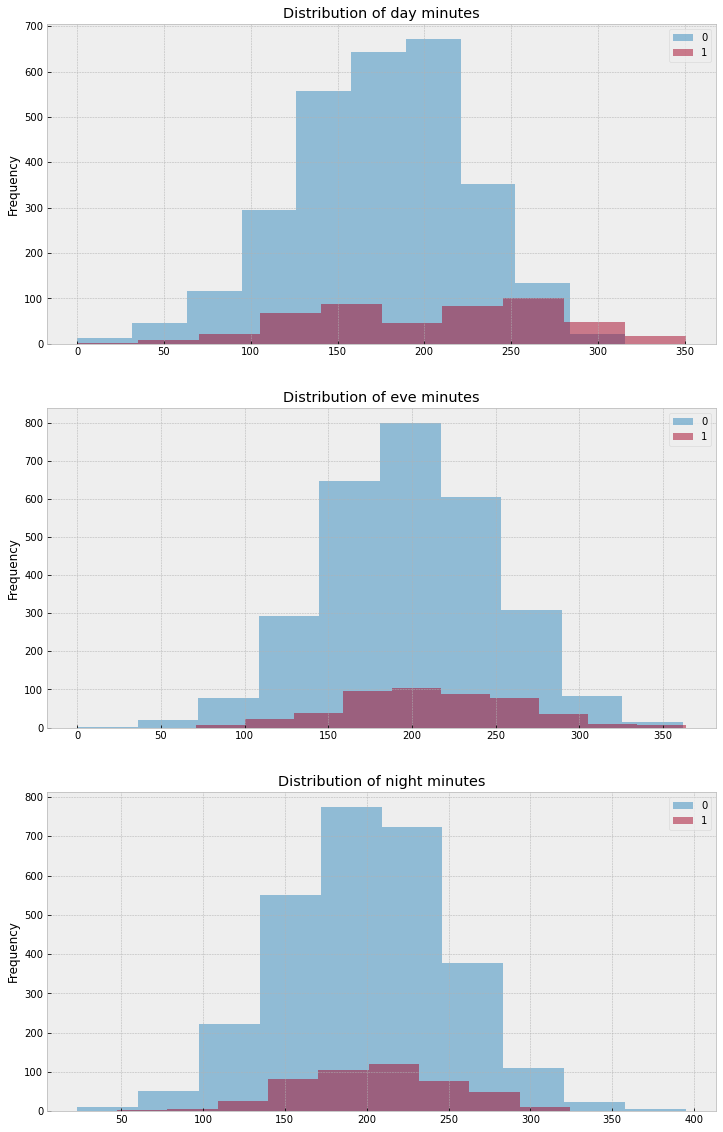

In [32]:
# Given the perfect correlation between the minutes and charge varibles, just on can be used for further analysis, and serve as a proxy for both for futher analysis

fig_float, ax = plt.subplots(nrows=3, ncols=1, figsize=[12, 20])
plt.style.use('bmh')

clean_float.groupby('churn')['total_day_minutes'].plot(kind='hist', alpha = 0.5, legend=True, ax=ax[0], title='Distribution of day minutes');
clean_float.groupby('churn')['total_eve_minutes'].plot(kind='hist', alpha = 0.5, legend=True, ax=ax[1], title='Distribution of eve minutes');
clean_float.groupby('churn')['total_night_minutes'].plot(kind='hist', alpha = 0.5, legend=True, ax=ax[2], title='Distribution of night minutes');


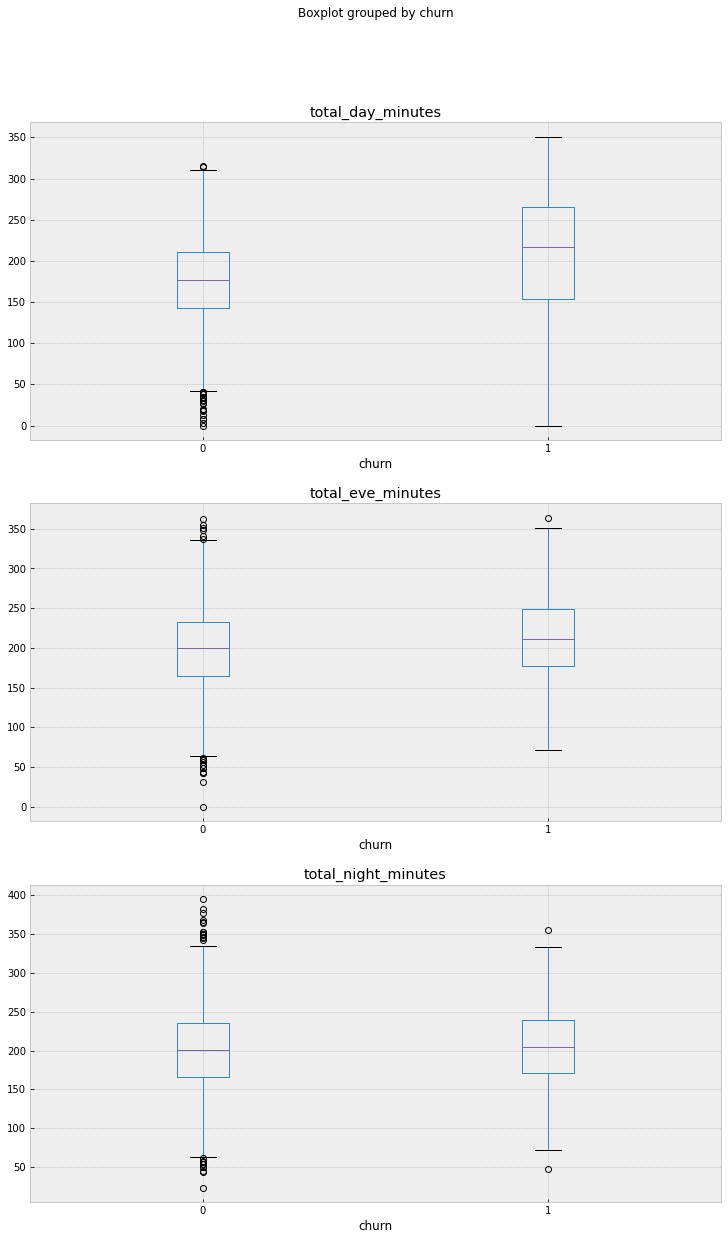

In [33]:
# night and eve minutes are distributed evenly between churned customers and current customers
# I used a box and whisker plot to further examine

fig_float, ax_float = plt.subplots(nrows=3, ncols=1, figsize=[12, 20])
clean_float.boxplot(column='total_day_minutes', by='churn', ax=ax_float[0]);
clean_float.boxplot(column='total_eve_minutes', by='churn', ax=ax_float[1]);
clean_float.boxplot(column='total_night_minutes', by='churn', ax=ax_float[2]);

In [34]:
#check the distrubution of the three varibles - first I defined a function 

def check_dist(df, variable):
    """ runs a my_df.groupby with churn as the grouping variable on a columns"""
    grouped_df = df[[variable, 'churn']]
    return grouped_df.groupby('churn').describe(percentiles=([0.05, .25, .5, .75, .95]))

In [35]:
# then I call the function on each of the variables 
display(check_dist(clean_df, 'total_day_minutes'))
display(check_dist(clean_df, 'total_eve_minutes'))
display(check_dist(clean_df, 'total_night_minutes'))

total_day_minutes                                                   \
                  count        mean        std  min     5%    25%    50%   
churn                                                                      
0                2849.0  175.132152  50.136438  0.0  89.58  142.8  177.2   
1                 481.0  206.414761  68.702625  0.0  96.50  153.1  217.2   

                             
         75%     95%    max  
churn                        
0      210.3  253.94  315.6  
1      265.6  305.10  350.8

total_eve_minutes                                                     \
                  count        mean        std   min      5%    25%    50%   
churn                                                                        
0                2849.0  199.091436  50.235292   0.0  118.32  164.5  199.6   
1                 481.0  212.080665  51.554915  70.9  125.80  176.7  211.1   

                            
         75%    95%    max  
churn                       
0      233.2  281.1  361.8  
1      249.3  299.1  363.7

total_night_minutes                                                     \
                    count        mean        std   min      5%    25%    50%   
churn                                                                          
0                  2849.0  200.134328  51.113968  23.2  115.98  165.9  200.4   
1                   481.0  205.375884  47.173237  47.4  130.00  171.5  205.0   

                             
         75%     95%    max  
churn                        
0      234.9  282.72  395.0  
1      239.9  283.60  354.9

In [36]:
# total_day_mintutes has a greater variation between churned and current customers - the difference between the medians is a tell-tail sign of this

# So with a different data distriution between churned and current customer, I run a logistic regression to predict churn status based on total_day_minutes 
# Here I define a function that calls a logistics regression and recommends a cut-off threshold based on the likelihood that any random row would be a churned customer. 

clean_df.loc[:,'churn'] = clean_df.loc[:,'churn'].astype(int)

# change_data_type(clean_df, ['churn'], pd.Int64Dtype())

def churn_logit_model(df, predicter_variable):
    """
    Takes a pandas DataFrame, a predicter variable and an outcome variable from within the DataFrame.
    Performs a logitic regression (with statsmodels.api.formula library)
    returns the summary of results
    
    """
    formula = 'churn' + ' ~ ' + predicter_variable
    model = smf.logit(formula=formula, data=df)
    result = model.fit()
    distribution = df.loc[:,'churn'] == 1
    recommended_cutoff = 'Based on the distribution of the outcome variable {} is the recommend cutoff value'.format(distribution.sum()/len(df))
    print(recommended_cutoff)
    print(result.summary())
    return result


# and here I define a function to plot the result of the regression 

def plot_logit(df, result, predicter_variable, cutoff_threshold=0.5):
    """
    Takes a pandas DataFrame, a predicter variable and an outcome variable from within the DataFrame.
    prints a line graph of the likelihood of the predictor variable being true 
    according to the predictor variable.
    Cutoff_threshold must be a float between 0-1 (0.5 by default)   
    """
    max_variable = df.loc[:,predicter_variable].max()
    prediction_range = int(max_variable + max_variable*0.2)
    X = pd.Series(range(prediction_range))
    X_df = pd.DataFrame(X)
    X_df.columns = [predicter_variable]
    p_y = result.predict(X_df)
    fig, ax = plt.subplots()
    p_y.plot(ax=ax)
    line = 'The cutoff point is {}, base on {} as the probabilitly threshold'.format(p_y[p_y>=cutoff_threshold].index[0], cutoff_threshold)
    ax.vlines(x=p_y[p_y>=cutoff_threshold].index[0], ymin=0, ymax=1, colors='black')
    return fig, line

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [37]:
#first I run the regression 
result = churn_logit_model(clean_df, 'total_day_minutes')

Optimization terminated successfully.
         Current function value: 0.391899
         Iterations 6
Based on the distribution of the outcome variable 0.14444444444444443 is the recommend cutoff value
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3330
Model:                          Logit   Df Residuals:                     3328
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                 0.05098
Time:                        20:47:39   Log-Likelihood:                -1305.0
converged:                       True   LL-Null:                       -1375.1
Covariance Type:            nonrobust   LLR p-value:                 2.406e-32
                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

(<Figure size 432x288 with 1 Axes>,
 'The cutoff point is 191, base on 0.14444444 as the probabilitly threshold')

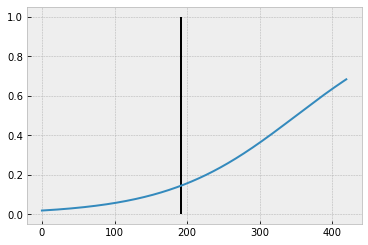

In [38]:
# then I plot the regression line with the recommended cut-off threshold 
plot_logit(clean_df, result, 'total_day_minutes', 0.14444444)

In [39]:
# finally I isolate the current customers that are over likely to churn based on the recommended threshold 

day_minutes_threshold_reg = 191
day_minutes_mask = clean_df.loc[:,'total_day_minutes'] > day_minutes_threshold_reg
likely_to_leave_float = clean_df.loc[day_minutes_mask,:]
current_mask = likely_to_leave_float.loc[:,'churn'] == 0
likely_to_leave_float_and_current_reg = likely_to_leave_float.loc[current_mask,:]
likely_to_leave_float_and_current_reg

,city,area_code,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,phone_num,which_plan
1,Orlando1,321,11,no,yes,38,209.8,130,35.67,196.6,84,16.71,233.0,79,10.49,1,0,4310,Voicemail only
2,Orlando1,321,12,yes,no,0,216.7,117,36.84,116.5,126,9.90,220.0,110,9.90,2,0,5211,International only
5,Orlando1,321,22,no,no,0,207.7,116,35.31,210.6,99,17.90,238.2,88,10.72,0,0,2401,No plan
7,Orlando1,321,27,no,no,0,227.4,67,38.66,248.0,115,21.08,61.4,109,2.76,1,0,1589,No plan
9,Orlando1,321,29,no,no,0,196.8,81,33.46,168.0,110,14.28,132.6,98,5.97,2,0,6666,No plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,Tallahassee,850,189,no,no,0,219.9,80,37.38,143.3,117,12.18,130.6,69,5.88,1,0,2407,No plan
3328,Tallahassee,850,195,no,yes,36,231.7,110,39.39,225.1,<NA>,19.13,201.7,89,9.08,0,0,7843,Voicemail only
3329,Tallahassee,850,201,no,yes,21,192.0,97,32.64,239.1,81,20.32,116.1,125,5.22,1,0,1486,Voicemail only
3330,Tallahassee,850,209,no,no,0,227.2,128,38.62,258.4,92,21.96,183.5,74,8.26,3,0,5310,No plan


total_day_minutes                                                   \
                  count        mean        std  min     5%    25%    50%   
churn                                                                      
0                2849.0  175.132152  50.136438  0.0  89.58  142.8  177.2   
1                 481.0  206.414761  68.702625  0.0  96.50  153.1  217.2   

                             
         75%     95%    max  
churn                        
0      210.3  253.94  315.6  
1      265.6  305.10  350.8

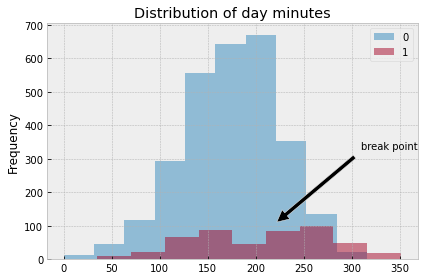

In [40]:
# considering this threshold results in over 1000 customer targeted for marketing, (out of under 4000), I re-examined the histogram. 
# given the 'break' in distribution around the median it would also be worth considering increasing the threshold. The median of the churned group is greater than the 
# 75th percentile in the curernt customer group. Therefore moving the threshold up to the median of the churn group would increase the priority with which the customer
# chould be contacted

display(check_dist(clean_df, 'total_day_minutes'))
fig_day_min, ax = plt.subplots()
clean_df.groupby('churn')['total_day_minutes'].plot(kind='hist', alpha = 0.5, legend=True, ax=ax, title='Distribution of day minutes');
ax.annotate('break point', xy=(217.2, 100),  xycoords='data',
            xytext=(1, 0.5), 
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
fig_day_min.tight_layout()
fig_day_min.savefig('distribution.png')

In [41]:
# now I isolate the priority group based on the higher threshold
day_minutes_threshold_dist = 217.2
day_minutes_mask = clean_df.loc[:,'total_day_minutes'] > day_minutes_threshold_dist
likely_to_leave_float = clean_df.loc[day_minutes_mask,:]
current_mask = likely_to_leave_float.loc[:,'churn'] == 0
likely_to_leave_float_and_current_dist = likely_to_leave_float.loc[current_mask,:]
likely_to_leave_float_and_current_dist

,city,area_code,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,customer_service_calls,churn,phone_num,which_plan
7,Orlando1,321,27,no,no,0,227.4,67,38.66,248.0,115,21.08,61.4,109,2.76,1,0,1589,No plan
19,Orlando1,321,43,no,no,0,241.9,101,41.12,129.4,121,11.00,264.8,104,11.92,1,0,2849,No plan
36,Orlando1,321,56,no,no,0,253.2,95,43.04,188.0,116,15.98,142.0,133,6.39,1,0,3622,No plan
38,Orlando1,321,57,yes,yes,30,234.5,130,39.87,195.2,116,16.59,268.8,94,12.10,2,0,3782,International & Voicemail
49,Orlando1,321,64,no,no,0,219.6,126,37.33,303.3,100,25.78,154.5,65,6.95,1,0,7728,No plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,Tallahassee,850,177,no,no,0,227.8,81,38.73,161.8,97,13.75,217.0,106,9.76,1,0,9716,No plan
3327,Tallahassee,850,189,no,no,0,219.9,80,37.38,143.3,117,12.18,130.6,69,5.88,1,0,2407,No plan
3328,Tallahassee,850,195,no,yes,36,231.7,110,39.39,225.1,<NA>,19.13,201.7,89,9.08,0,0,7843,Voicemail only
3330,Tallahassee,850,209,no,no,0,227.2,128,38.62,258.4,92,21.96,183.5,74,8.26,3,0,5310,No plan


In [42]:
# and save them for the marketing team to use in the campaign
likely_to_leave_float_and_current_dist.to_csv('day_call_minutes_candidates_conservitive.csv')
likely_to_leave_float_and_current_reg.to_csv('day_call_minute_candidates_liberal.csv')

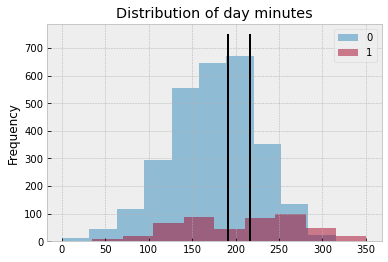

In [43]:
fig_float, ax = plt.subplots()
plt.style.use('bmh')

clean_float.groupby('churn')['total_day_minutes'].plot(kind='hist', alpha = 0.5, legend=True, ax=ax, title='Distribution of day minutes')
ax.vlines(x=217.2, ymin=0, ymax=750, colors='black')
ax.vlines(x=191, ymin=0, ymax=750, colors='black')

## Visualize the results

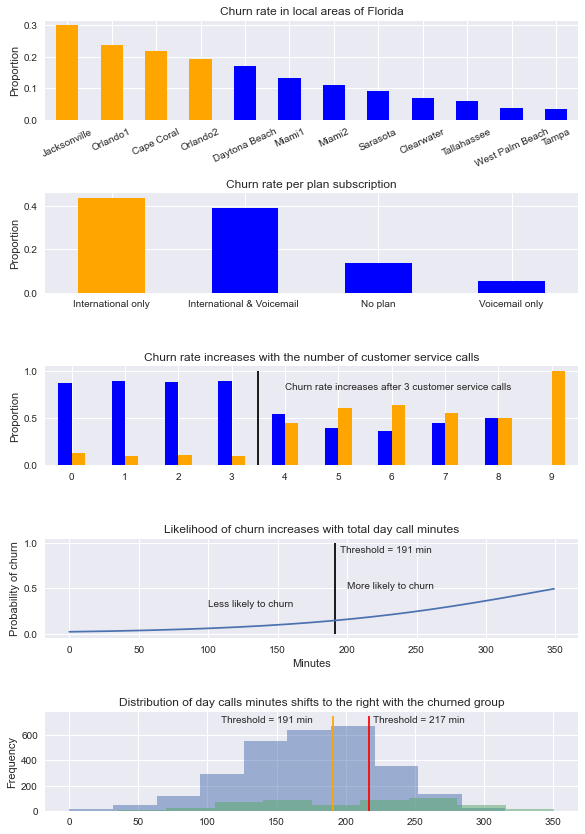

In [44]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=[8.27, 11.69], nrows=5, ncols=1)

# cities - bar graph showing churn rate from highest to lowest
colours = ['orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
sorted_city_churn.loc[:,1].plot(kind='bar', ax=ax[0], color=colours)
ax[0].xaxis.set_tick_params(labelrotation=25)
ax[0].set(xlabel=None, title='Churn rate in local areas of Florida', ylabel='Proportion')

# interational plan churn rate v voicemail churn rate 
colours = ['orange', 'blue', 'blue', 'blue']
sorted_plan_churn.loc[:,1].plot(kind='bar', ax=ax[1], color=colours, title='Churn rate per plan subscription')
ax[1].xaxis.set_tick_params(labelrotation=0)
ax[1].set(ylabel='Proportion', xlabel=None)


# customer service calls
colours=['blue', 'orange']
customer_service_churn = pd.crosstab(index=clean_df.loc[:,'customer_service_calls'], columns=df.loc[:,'churn'], normalize='index').plot(kind='bar', ax=ax[2], color=colours, legend=False);
ax[2].xaxis.set_tick_params(labelrotation=0)
ax[2].set(xlabel=None, title='Churn rate increases with the number of customer service calls', ylabel='Proportion')
ax[2].vlines(x=3.5, ymin=0, ymax=1, colors='black')
ax[2].annotate(text='Churn rate increases after 3 customer service calls',
            xy=[4, 0.8]),


# day minutes probability curve
X = pd.Series(range(350))
X_df = pd.DataFrame(X)
X_df.columns = ['total_day_minutes']
p_y = result.predict(X_df)
p_y.plot(ax=ax[3])
ax[3].set(xlabel='Minutes', ylabel='Probability of churn', title='Likelihood of churn increases with total day call minutes')
ax[3].vlines(x=p_y[p_y>=0.1444444].index[0], ymin=0, ymax=1, colors='black')
ax[3].annotate(text='More likely to churn',
            xy=[200, 0.5])
ax[3].annotate(text='Less likely to churn',
            xy=[100, 0.3])
ax[3].annotate(text='Threshold = 191 min',
            xy=[195, 0.9])

# distributions and thresholds 
clean_float.groupby('churn')['total_day_minutes'].plot(kind='hist', alpha = 0.5, legend=False, ax=ax[4], title='Distribution of day calls minutes shifts to the right with the churned group')
ax[4].vlines(x=217.2, ymin=0, ymax=750, colors='red')
ax[4].vlines(x=191, ymin=0, ymax=750, colors='orange')

ax[4].annotate(text='Threshold = 217 min', 
               xy=[220,700])
ax[4].annotate(text='Threshold = 191 min', 
               xy=[110,700])

fig.tight_layout()
fig.savefig('churn_analysis.png')

## Recommendations 

###################################################################################################
## This analysis investigated variables that were associated with a customer's likeliness to ###
 ##                   churn from their phone  contact with Teleconfia                       ###
 ###############################################################################################
 
# EXECUTIVE SUMMARY
     # Churn rates are highest in Jacksonville, Orlando1, Orlando2 and Cape Coral
        # These 4 areas should be the targets of the first, location-based, marketing campaign
     # Customers on the International Plan have the highest churn rates 
     # Customers who make more than 3 customer service calls have high churn rates
        # These two groups of customers should be the target of the second, customer-based, campaign
     # The total number of day minutes had an influence on churn rate
        # Customer with more the 217 total day minutes should be considered for inclusion in second campaign

        
##  BREAKDOWN

### CAMPAIGN ONE - LOCATION BASED:

    # RECOMMENDATION
        # Jacksonville, Orlando1, Orlando2 and Cape Coral should be the target areas for the location-based
        # campaign.
    # REASON
        # Churn rates are highest in Jacksonville, Orlando1, Orlando2 and Cape Coral, rates of 30%, 24%, 19% and 
        # 22% respectively (shown in figure axis 0). The customers who have phone numbers accossiated with these 
        # four area codes are saved in the working directory under the name 'location_based_candidates.csv'. 
        # This file can be used in the future to identify customers who were the target of campaign one, and 
        # assess its effectiveness.

### CAMPAIGN TWO - CUSTOMER BASED:
   
    # RECOMMENDATION 1 - PLANS
        # Customers on the International plan should be contacted and offered a special deal as a matter of
        # priority. The phone numbers of these customers are listed in the file 'plan_based_candidates.csv'. 
    # REASON
        # The International Plan has the highest churn rate (44%) compared with the Voicemail Plan (5%), a 
        # combination of plans (39%), and having no specific plan (14%). The Voicemail plan performed very well, 
        # with the lowest churn rate, however customers with subscribing to both Voicemail and International Plan's
        # had similar churn rates to those just with the International Plan. These relationships are illustrated 
        # in the figure axis 1. 
        
        
    # RECOMMENDATION 2 - CUSTOMER SERVICE CALLS
        # Customers should be contacted and offered a special deal after their 3rd call with customer service. 
        # The number of customer service calls should be monitored regularly to ensure the customer is contacted 
        # after the 3rd, but before thier 4th customer service call.
        # The phone numbers of these customers are listed in the file 'customer_service_based_candidates.csv'.
    # REASON
        # The number of customer service calls a customer has effects the churn rates (seen in figure axis 2).
        # Customer who make 0-3 customer service calls have low churn rates (below 15%). However, from the 4th call
        # churn rate increases substaintailly, with churn rates of over 45% thereafter.
    
    # RECOMMENDATION 3 - TOTAL DAY MINUTES
        # Customers with total day minutes above 217.2 minutes should be considered for inclusion in campaign two.
        # The phone numbers of these customers are listed in the file 'day_call_minutes_candidates_conservitive.csv'.
    # REASON
        # 75% of customers who did not churn, had a total day minutes of 210.3 minutes or lower. By comparison, 50% of 
        # the customer who did, had a total day minutes or 217.2 minutes or higher. It is important to note that this 
        # variable was distrubuted differently between the two groups (churned and not churned), as well has having 
        # vastly different sample sizes (churned accounted for only 14% of the total sample).  Taking into account the 
        # discrepencies in sample size, a cut-off threshold of 191 was recommend by a logistic regression. However 
        # when applying this threshold to the  dataset, over one third of the of customers who had not churned were 
        # flagged for inclusion in the campaign. If telefoncia is to scale it's operation, dedicating resources to 
        # such a large proportion of customers has the potential to be very costly. Hence, the more conservitive 
        # cut-off of 217.2 minutes is recommended as a starting point, and if resources allow, those with 191 minutes 
        # and over should also be considered for inclusion. Figure axes 3 and 4 illustrate the differences in thresholds
        # relative to the distribution of data. 
        